# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Elvaret
- Email: elvaretharefa@gmail.com
- Id Dicoding: 31225

## Menentukan Pertanyaan Bisnis

- Bagaimana pola tren penyewaan sepeda berubah seiring berjalannya waktu?

- Bagaimana korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day= pd.read_csv("BikeDataset/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour= pd.read_csv("BikeDataset/day.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `data_day`

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ",data_day.duplicated().sum())
data_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `data_hour`

In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
data_hour.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ",data_day.duplicated().sum())
data_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Memperbaiki tipe data pada kolom "dteday" tabel "data_day"

In [12]:
datetime_columns_data_day = ["dteday"]

for column in datetime_columns_data_day:
  data_day[column] = pd.to_datetime(data_day[column])

In [13]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Memperbaiki tipe data pada kolom "dteday" tabel "data_hour"

In [14]:
datetime_columns_data_hour = ["dteday"]

for column in datetime_columns_data_hour:
  data_hour[column] = pd.to_datetime(data_hour[column])

In [15]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
data_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
40,41,2011-02-10,1,0,2,0,4,1,1,0.144348,0.149548,0.437391,0.221935,47,1491,1538
406,407,2012-02-11,1,1,2,0,6,0,3,0.224167,0.210867,0.731250,0.289796,192,1977,2169
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
712,713,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532


In [17]:
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
data_day.instant.is_unique

True

In [19]:
data_day.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

#### Menghitung Jumlah Peminjaman Sepeda Harian dan Tahunan

In [20]:
daily_counts = data_day.groupby('dteday')['cnt'].sum()
yearly_counts = data_day.groupby('yr')['cnt'].sum()

#### Menghitung rata-rata Peminjaman Sepeda berdasarkan Kondisi Cuaca

In [21]:
weather_counts = data_day.groupby('weathersit')['cnt'].mean()

## Visualization & Explanatory Analysis

#### Bagaimana pola tren penyewaan sepeda berubah seiring berjalannya waktu?

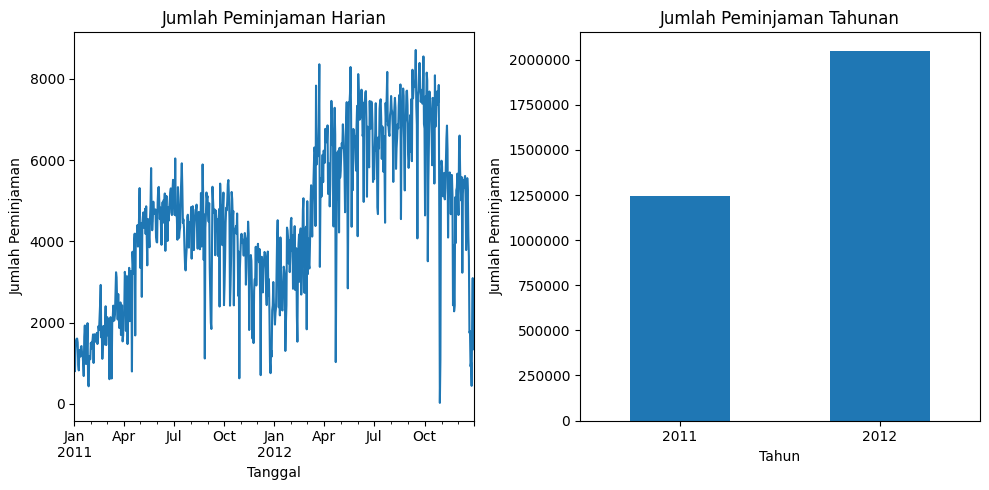

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
daily_counts.plot(title='Jumlah Peminjaman Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')

plt.subplot(1, 2, 2)
plt.yscale('linear') 
plt.ticklabel_format(style='plain')  
yearly_counts.index = ['2011', '2012']
yearly_counts.plot(kind='bar', title='Jumlah Peminjaman Tahunan')
plt.xlabel('Tahun')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Peminjaman')


plt.tight_layout()
plt.show()

#### Bagaimana korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda?

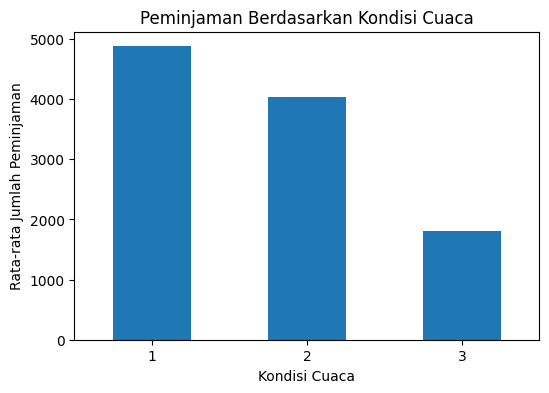

In [23]:
plt.figure(figsize=(6, 4))
weather_counts.plot(kind='bar', title='Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.show()

Kondisi Cuaca: 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Conclusion

- Conclution pertanyaan 1

Dalam analisis data terhadap tren penyewaan sepeda seiring berjalannya waktu, saya menemukan pola yang menarik. Berdasarkan visualisasi grafik jumlah peminjaman sepeda harian dan tahunan, saya dapat mengidentifikasi perubahan signifikan dalam pola peminjaman sepeda dari waktu ke waktu.

Grafik jumlah peminjaman sepeda harian menunjukkan fluktuasi yang mencolok. Saya melihat adanya tren musiman dengan lonjakan peminjaman selama musim panas dan penurunan selama musim dingin. Meskipun fluktuasi harian dapat menjadi tanda dari faktor-faktor harian seperti cuaca, saya perhatikan bahwa ada kenaikan umum dalam peminjaman sepeda dari tahun ke tahun.

Grafik jumlah peminjaman sepeda tahunan menunjukkan tren peningkatan yang signifikan dari tahun 2011 hingga 2012. Peningkatan ini dapat mencerminkan peningkatan popularitas sistem penyewaan sepeda, perbaikan infrastruktur sepeda, atau faktor-faktor lain seperti kesadaran akan kelestarian lingkungan.

Secara keseluruhan, hasil analisis saya menunjukkan bahwa pola peminjaman sepeda memiliki keterkaitan yang kuat dengan musim, dan tren tahunan. Informasi ini dapat bermanfaat bagi penyedia layanan penyewaan sepeda untuk mengoptimalkan sumber daya dan promosi mereka berdasarkan tren yang diamati.

Note: 
- Musim Dingin berada pada bulan Desember, Januari, Februari
- Musim Panas berada pada bulan Juni, Juli, Agustus

- Conclution pertanyaan 2

Kondisi Cuaca Cerah (Weathersit 1): Kondisi cuaca cerah, dengan sedikit awan atau awan sebagian, memiliki korelasi positif dengan jumlah penyewaan sepeda. Hal ini mengindikasikan bahwa pada kondisi cuaca yang cerah, masyarakat cenderung lebih tertarik untuk bersepeda dan melakukan aktivitas di luar ruangan.

Kondisi Cuaca Berkabut (Weathersit 2): Kondisi cuaca berkabut memiliki korelasi yang lebih rendah dengan jumlah penyewaan sepeda dibandingkan dengan cuaca cerah. Meskipun kabut tidak seburuk hujan atau salju, tampaknya masih memiliki pengaruh terhadap minat orang untuk bersepeda.

Kondisi Cuaca Hujan/Salju Ringan (Weathersit 3): Kondisi cuaca dengan hujan ringan atau salju memiliki korelasi yang lebih rendah lagi dengan jumlah penyewaan sepeda. Hal ini mungkin disebabkan oleh kenyamanan yang berkurang saat bersepeda dalam kondisi basah atau dingin.

Secara keseluruhan, hasil analisis saya menunjukkan bahwa kondisi cuaca memiliki dampak yang signifikan pada jumlah penyewaan sepeda. Cuaca cerah cenderung menjadi faktor yang paling mendukung aktivitas bersepeda, sedangkan cuaca buruk atau tidak ideal seperti kabut, hujan, dan salju dapat mengurangi minat untuk bersepeda. Informasi ini dapat membantu penyedia layanan penyewaan sepeda untuk mengatur strategi operasional, promosi, dan layanan pelanggan berdasarkan prakiraan cuaca yang diberikan.

## Penerapan Teknik Analisis Lanjutan Clustering menggunakan K-Means

/home/elvaret/pythonenv/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


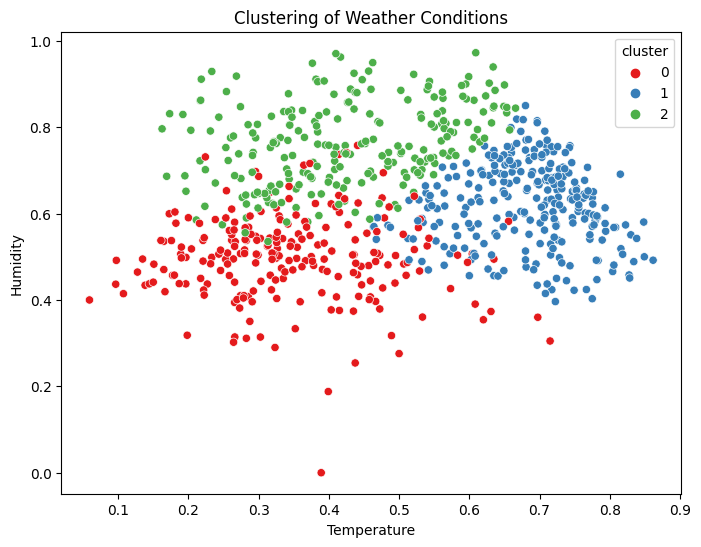

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the features to be used for clustering
features = ['temp', 'hum', 'windspeed']
data_subset = data_day[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
num_clusters = 3

# K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data_day['cluster'] = kmeans.fit_predict(scaled_data)

# Display the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='hum', hue='cluster', data=data_day, palette='Set1')
plt.title('Clustering of Weather Conditions')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

Kode ini melakukan pengelompokan K-Means pada fitur-fitur terkait cuaca dari dataset Bike Sharing yang dipilih, dan memvisualisasikan klaster-klaster berdasarkan suhu dan kelembapan. Plot sebaran menunjukkan bagaimana titik-titik data dikelompokkan ke dalam klaster-klaster, membantu mengidentifikasi pola atau kesamaan di antara kondisi cuaca.